In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [33]:
df8 = pd.read_csv(R"Data\bound_8_all.csv")

In [34]:
df8.head()

,coefficients,signature,discriminant
0,"[1, -7, -8, -3, -4]",[2],-1760871
1,"[1, -7, -8, -3, -2]","[2, 1]",-350191
2,"[1, -7, -8, -3, -1]",[2],-50724
3,"[1, -7, -8, -3, 1]",[2],-255856
4,"[1, -7, -8, -3, 2]",[1],-757383


In [35]:
df8_uni= df8.drop_duplicates(subset=['signature', 'discriminant'])
df8_uni.describe()

,discriminant
count,2.522700e+04
mean,-1.115002e+06
std,1.996222e+06
min,-2.088550e+07
25%,-1.344408e+06
50%,-3.570430e+05
75%,-4.074800e+04
max,3.353344e+06


In [36]:
df8_uni['signature'] = df8_uni['signature'].apply(ast.literal_eval)
df8_uni['coefficients'] = df8_uni['coefficients'].apply(ast.literal_eval)

C:\Users\shuma\AppData\Local\Temp\ipykernel_29992\3209405127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8_uni['signature'] = df8_uni['signature'].apply(ast.literal_eval)
C:\Users\shuma\AppData\Local\Temp\ipykernel_29992\3209405127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8_uni['coefficients'] = df8_uni['coefficients'].apply(ast.literal_eval)


In [37]:
df8_uni= df8_uni.copy()

In [38]:
df8_uni.head()

,coefficients,signature,discriminant
0,"[1, -7, -8, -3, -4]",[2],-1760871
1,"[1, -7, -8, -3, -2]","[2, 1]",-350191
2,"[1, -7, -8, -3, -1]",[2],-50724
3,"[1, -7, -8, -3, 1]",[2],-255856
4,"[1, -7, -8, -3, 2]",[1],-757383


In [ ]:
df8_uni['type_I'] = df8_uni.signature.apply(max) >1
df8_uni['2-monogen'] = df8_uni.signature.apply(sum)>1

In [47]:
df8_uni.head()

,coefficients,signature,discriminant,type_I,2-monogen
0,"[1, -7, -8, -3, -4]",[2],-1760871,True,True
1,"[1, -7, -8, -3, -2]","[2, 1]",-350191,True,True
2,"[1, -7, -8, -3, -1]",[2],-50724,True,True
3,"[1, -7, -8, -3, 1]",[2],-255856,True,True
4,"[1, -7, -8, -3, 2]",[1],-757383,False,False


<Axes: xlabel='2-monogen'>

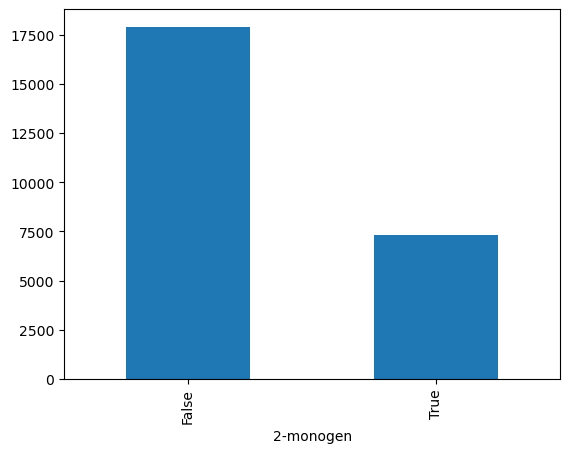

In [57]:
df8_uni['2-monogen'].value_counts().plot(kind= 'bar')

In [58]:
df8_uni_2= df8_uni[df8_uni['2-monogen'] == True]

In [61]:
inspect= df8_uni_2[df8_uni_2['type_I']== False]

In [68]:
inspect.head(10)

,coefficients,signature,discriminant,type_I,2-monogen
429,"[1, -7, -6, -8, -6]","[1, 1]",-2686028,False,True
465,"[1, -7, -6, -6, 2]","[1, 1]",-1521004,False,True
726,"[1, -7, -5, -5, -6]","[1, 1]",-2949068,False,True
918,"[1, -7, -5, 8, -7]","[1, 1]",-5898119,False,True
964,"[1, -7, -4, -6, -6]","[1, 1]",-2872236,False,True
971,"[1, -7, -4, -6, 2]","[1, 1]",-1246604,False,True
1280,"[1, -7, -3, -2, -3]","[1, 1]",-697343,False,True
1815,"[1, -7, 6, -1, -8]","[1, 1]",-1917999,False,True
1934,"[1, -7, 6, 7, -2]","[1, 1]",341465,False,True
1990,"[1, -7, 7, -6, -5]","[1, 1]",-1337863,False,True


In [69]:
inspect.to_csv('EXP_orders.csv', index= False)

Text(0, 0.5, 'precents')

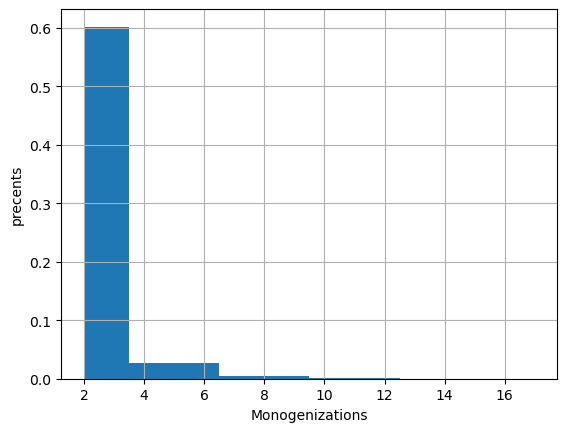

In [60]:
df8_uni_2['signature'].apply(sum).hist( density = True)

plt.xlabel('Monogenizations')
plt.ylabel('precents')
